# Draft: AuxTel Pointing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm

from astropy.table import Table, join

In [3]:
%matplotlib inline


## The Dataset

This sample was queried using the script `query_pointing_bluter.py`. Basically, the code query the WCS solution from the bulter calibrate task and some information from the exposure metadata.

The main quantities of this dataset are:
- `RA`, `DEC` : pointing sky position from the exposure metadata
- `RA_WCS`, `DEC_WCS` : pointing sky position from the wcs solutions
- `PNT_OFFSET`: angular distance between the two pointings.

The other columns are exclusively from the metadata: `MJD`,`EXPTIME`,`TEMP_SET`,`CCDTEMP`,`FILTER`,`ELSTART`,`ELEND`,`AZSTART`,`AZEND`

The file `data/checking_auxtel_pointing_{date}.csv` contains info about 1421 exposures taken from Feb 2020 up to Nov 2021. The collection used to generate this file was `u/mfl/testProcessCcd_srcMatchFull_181e6356`. And it's from the `lsst.rapid.analysis.butlerUtils`.



# The Telescope Pointing

In [68]:
import pandas as pd
date = 23032022
# df = pd.read_csv(f'data/checking_auxtel_pointing_{date}.csv',index_col=0)

# df = pd.read_csv('data/rev_checking_auxtel_pointing_24032022.csv',index_col=0)
df = pd.read_csv('data/rev_checking_auxtel_pointing_2022run.csv',index_col=0)
# df = pd.read_csv('data/test_checking_auxtel_pointing_23032022.csv',index_col=0)

df.DATE = pd.to_datetime(df.DATE)#.dt.date

In [69]:
df

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,ELEND_MD,AZSTART_MD,AZEND_MD,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET
2022031600240,2022-03-17 00:50:58.033383,59655.035394,30.0,53.513709,-27.333654,1.705802,24.123734,256.419135,35.825495,53.513513,...,35.709862,256.419135,256.369683,53.522814,-27.326193,-0.546319,-0.447648,-0.714773,-0.312649,0.660259
2022031600243,2022-03-17 00:52:45.206742,59655.036634,30.0,52.879167,-27.333670,1.744112,24.477806,256.032372,34.918280,52.878966,...,34.802810,256.032372,255.982847,52.888401,-27.326244,-0.554033,-0.445545,-0.709010,-0.317029,0.663899
2022031600257,2022-03-17 01:03:41.990263,59655.044236,30.0,53.197389,-27.331533,1.837974,25.088125,255.160360,32.888142,53.196240,...,32.772954,255.160360,255.107768,53.205483,-27.325393,-0.485603,-0.368344,-0.585798,-0.279832,0.567263
2022031600258,2022-03-17 01:04:14.816656,59655.044616,30.0,53.196386,-27.333634,1.843668,25.086357,255.107768,32.772954,53.196240,...,32.657939,255.107768,255.057878,53.205556,-27.325465,-0.550198,-0.490151,-0.744232,-0.291814,0.692213
2022031600259,2022-03-17 01:06:24.810425,59655.046120,30.0,196.362286,-89.896742,1.978408,359.990882,179.938962,30.271401,196.363636,...,30.271393,179.938962,179.938845,191.857995,-89.894895,270.257486,-0.110772,-0.034201,-0.502712,0.503600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022031700468,2022-03-18 03:44:05.316634,59656.155617,30.0,220.945533,-45.060265,1.520015,352.503446,125.441034,41.070840,220.945347,...,41.167825,125.441034,125.431921,220.945578,-45.059196,-0.002697,-0.064157,0.084880,0.006222,0.064185
2022031700469,2022-03-18 03:44:46.160309,59656.156090,30.0,220.945515,-45.060276,1.516395,352.697467,125.429724,41.191298,220.945347,...,41.288191,125.429724,125.420854,220.945698,-45.059173,-0.010999,-0.066169,0.087215,0.012078,0.066624
2022031700470,2022-03-18 03:45:18.907739,59656.156469,30.0,220.945600,-45.060299,1.513515,352.696788,125.420854,41.288191,220.945347,...,41.385196,125.420854,125.412125,220.945663,-45.059127,-0.003753,-0.070341,0.093354,0.007132,0.070391
2022031700471,2022-03-18 03:46:00.485479,59656.156950,30.0,220.945570,-45.060268,1.509866,353.223869,125.410050,41.408697,220.945347,...,41.505669,125.410050,125.401582,220.945452,-45.059103,0.007067,-0.069927,0.093629,-0.000663,0.070105


In [70]:
import numpy as np

deg = np.pi/180.
def separation(ra1,dec1,ra2,dec2):
    return np.sqrt( np.cos(dec1*deg)*(ra1-ra2)**2 + (dec1-dec2)**2 )*3600.

def getAngDist(ra1, dec1, ra2, dec2):
    # output in arcmin
    delt_lon = (ra1 - ra2)*np.pi/180.
    delt_lat = (dec1 - dec2)*np.pi/180.
    # Haversine formula
    dist = 2.0*np.arcsin( np.sqrt( np.sin(delt_lat/2.0)**2 + \
         np.cos(dec1*np.pi/180.)*np.cos(dec2*np.pi/180.)*np.sin(delt_lon/2.0)**2 ) )  
    return (dist/np.pi*180.)*60

In [179]:
# df['AZMEAN'] = 0.5*(df['AZEND']+df['AZSTART'])
# df['ELMEAN'] = 0.5*(df['ELEND']+df['ELSTART'])

# df['dRA'] = (df['RA_WCS']-df['RA'])*60
# df['dDEC']= (df['DEC_WCS']-df['DEC'])*60

df['PNT_OFFSET'] = getAngDist(df['RA_WCS'], df['DEC_WCS'], df['RA'], df['DEC'])

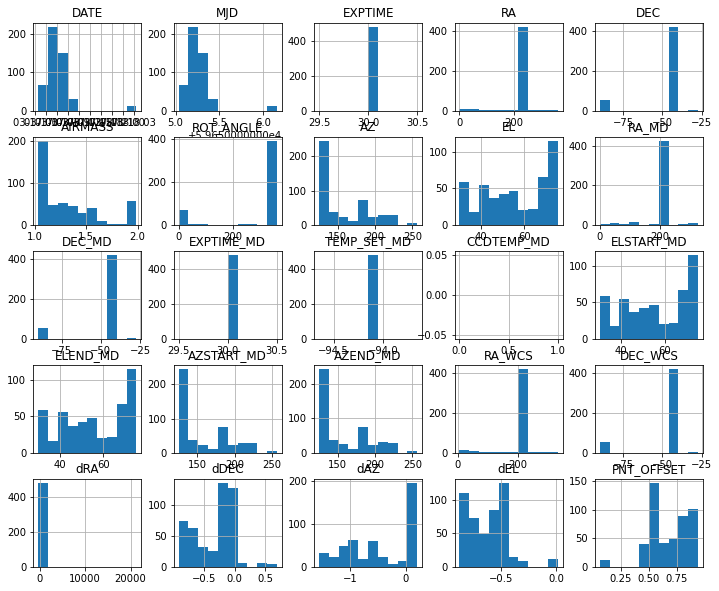

In [72]:
_ = df.hist(figsize=(12,10))

In [73]:
# outliers = np.abs(df['PNT_OFFSET'])>60
outliers = np.abs(df['dRA'])>2*3600
df[outliers]

,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,RA_MD,...,ELEND_MD,AZSTART_MD,AZEND_MD,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL,PNT_OFFSET
2022031600265,2022-03-17 01:11:35.933958,59655.049721,30.0,359.996004,-89.896727,1.983017,37.172384,180.156066,30.193154,0.0,...,30.192707,180.156066,180.155758,5.520111,-89.891691,21268.55361,-0.302179,-0.646712,-0.390415,0.682154


In [74]:
df[['RA','RA_WCS','dRA','PNT_OFFSET']][outliers]

,RA,RA_WCS,dRA,PNT_OFFSET
2022031600265,359.996004,5.520111,21268.55361,0.682154


Note: suggest to DM to add a mod into their offset function (dRa, dDec, ...).

In [75]:
21578.316413/60. # deg

359.63860688333335

In [76]:
(360-21578.316413/60.) # this should be dRA (deg)

0.36139311666664753

## Subsample

In [180]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]

df1 = df[cols][~outliers]
# df1['DATE'] = df1['DATE'].dt.date

In [78]:
df1

,PNT_OFFSET,DATE,MJD,EXPTIME,RA,DEC,AIRMASS,ROT_ANGLE,AZ,EL,...,ELSTART_MD,ELEND_MD,AZSTART_MD,AZEND_MD,RA_WCS,DEC_WCS,dRA,dDEC,dAZ,dEL
2022031600240,0.660259,2022-03-17 00:50:58.033383,59655.035394,30.0,53.513709,-27.333654,1.705802,24.123734,256.419135,35.825495,...,35.825495,35.709862,256.419135,256.369683,53.522814,-27.326193,-0.546319,-0.447648,-0.714773,-0.312649
2022031600243,0.663899,2022-03-17 00:52:45.206742,59655.036634,30.0,52.879167,-27.333670,1.744112,24.477806,256.032372,34.918280,...,34.918280,34.802810,256.032372,255.982847,52.888401,-27.326244,-0.554033,-0.445545,-0.709010,-0.317029
2022031600257,0.567263,2022-03-17 01:03:41.990263,59655.044236,30.0,53.197389,-27.331533,1.837974,25.088125,255.160360,32.888142,...,32.888142,32.772954,255.160360,255.107768,53.205483,-27.325393,-0.485603,-0.368344,-0.585798,-0.279832
2022031600258,0.692213,2022-03-17 01:04:14.816656,59655.044616,30.0,53.196386,-27.333634,1.843668,25.086357,255.107768,32.772954,...,32.772954,32.657939,255.107768,255.057878,53.205556,-27.325465,-0.550198,-0.490151,-0.744232,-0.291814
2022031600259,0.503600,2022-03-17 01:06:24.810425,59655.046120,30.0,196.362286,-89.896742,1.978408,359.990882,179.938962,30.271401,...,30.271401,30.271393,179.938962,179.938845,191.857995,-89.894895,270.257486,-0.110772,-0.034201,-0.502712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022031700468,0.064185,2022-03-18 03:44:05.316634,59656.155617,30.0,220.945533,-45.060265,1.520015,352.503446,125.441034,41.070840,...,41.070840,41.167825,125.441034,125.431921,220.945578,-45.059196,-0.002697,-0.064157,0.084880,0.006222
2022031700469,0.066624,2022-03-18 03:44:46.160309,59656.156090,30.0,220.945515,-45.060276,1.516395,352.697467,125.429724,41.191298,...,41.191298,41.288191,125.429724,125.420854,220.945698,-45.059173,-0.010999,-0.066169,0.087215,0.012078
2022031700470,0.070391,2022-03-18 03:45:18.907739,59656.156469,30.0,220.945600,-45.060299,1.513515,352.696788,125.420854,41.288191,...,41.288191,41.385196,125.420854,125.412125,220.945663,-45.059127,-0.003753,-0.070341,0.093354,0.007132
2022031700471,0.070105,2022-03-18 03:46:00.485479,59656.156950,30.0,220.945570,-45.060268,1.509866,353.223869,125.410050,41.408697,...,41.408697,41.505669,125.410050,125.401582,220.945452,-45.059103,0.007067,-0.069927,0.093629,-0.000663


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.matshow(df.corr())
# plt.show()

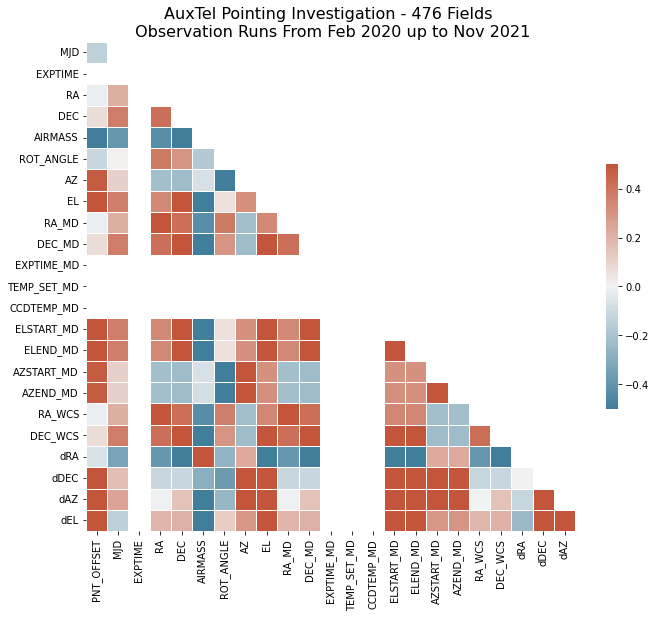

In [80]:
# Compute the correlation matrix
df1b = df1.copy()
df1b.dEL = np.abs(df1b.dEL)
df1b.dDEC = np.abs(df1b.dDEC)

df1b.dAZ = np.abs(df1b.dAZ)
df1b.dRA = np.abs(df1b.dRA)

df_corr = df1b.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title(f'AuxTel Pointing Investigation - {len(df1)} Fields \n Observation Runs From Feb 2020 up to Nov 2021',fontsize=16)
plt.savefig(f'figures/rev_correlation_matrix_{date}.png',facecolor='w',transparent=False,dpi=100)

Text(0.5, 1.0, 'AuxTel Pointing Investigation - 476 Fields \n Observation Runs From Feb 2020 up to Nov 2021')

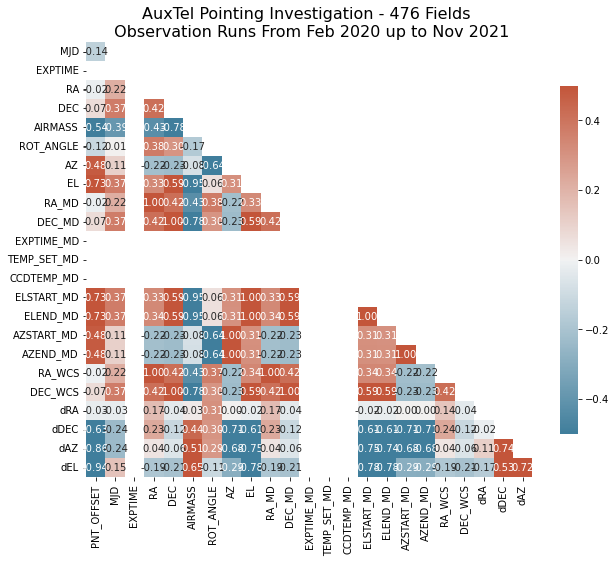

In [81]:
fig, ax = plt.subplots(figsize=(10, 8))

df_corr = df1.corr()

# mask
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap,
           vmin=-0.5, vmax=0.5, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.title(f'AuxTel Pointing Investigation - {len(df1)} Fields \n Observation Runs From Feb 2020 up to Nov 2021',fontsize=16)

# plt.savefig(f'figures/correlation_matrix_{date}.png',facecolor='w',transparent=False,dpi=100)

In [84]:
p1,pm,p2 = np.percentile(df1.PNT_OFFSET, [16,50,84])
s68 = (p2-p1)/2.
s68

0.195478672243171

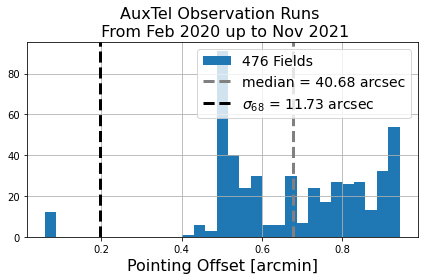

In [85]:
df1['PNT_OFFSET'].hist(bins=31,label=f'{len(df1)} Fields')
plt.axvline(pm,color='gray',ls='--',lw=3, label=r'median = %.2f arcsec'%(pm*60))
plt.axvline(s68,color='k',ls='--',lw=3, label=r'$\sigma_{68}$ = %.2f arcsec'%(s68*60))

plt.xlabel('Pointing Offset [arcmin]',fontsize=16)

plt.legend(fontsize=14)
plt.title(f'AuxTel Observation Runs \n From Feb 2020 up to Nov 2021',fontsize=16)
plt.tight_layout()
plt.savefig(f'figures/rev_pointing_offset_distribution_{date}.png',facecolor='w',transparent=False,dpi=100)

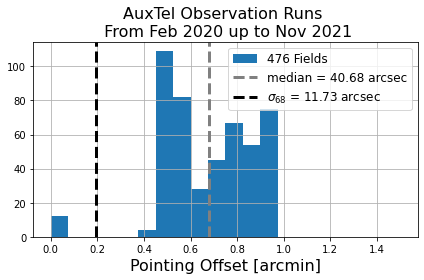

In [89]:
df1['PNT_OFFSET'].hist(bins=np.linspace(0.,1.5,21),label=f'{len(df1)} Fields')
plt.axvline(pm,color='gray',ls='--',lw=3, label=r'median = %.2f arcsec'%(pm*60))
plt.axvline(s68,color='k',ls='--',lw=3, label=r'$\sigma_{68}$ = %.2f arcsec'%(s68*60))

plt.xlabel('Pointing Offset [arcmin]',fontsize=16)
plt.legend(fontsize=12)
plt.title(f'AuxTel Observation Runs \n From Feb 2020 up to Nov 2021',fontsize=16)
plt.tight_layout()
plt.savefig(f'figures/rev_pointing_offset_distribution_{date}_zoom_in.png',facecolor='w',transparent=False,dpi=100)

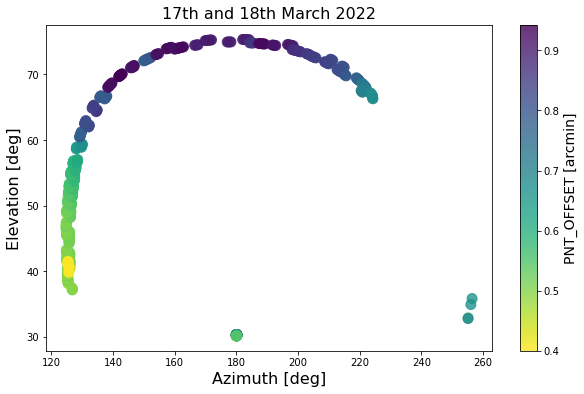

In [171]:
plt.figure(figsize=(10,6))
plt.scatter(df1.AZ, df1.EL, s=100, alpha=0.8, c=df1.PNT_OFFSET, vmin=0.4, label=f'{len(df1)} Fields', cmap='viridis_r')
plt.colorbar().set_label('PNT_OFFSET [arcmin]',fontsize=14)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('Azimuth [deg]',fontsize=16)
plt.title('17th and 18th March 2022',fontsize=16)
plt.savefig(f'figures/azel_plane_march_2022.png',facecolor='w',transparent=False,dpi=100)

Text(0.5, 0, 'Azimuth [deg]')

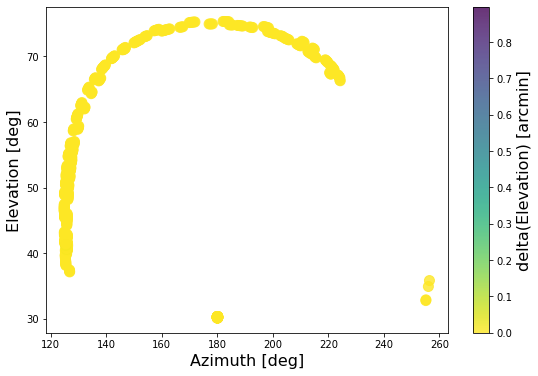

In [147]:
plt.figure(figsize=(9,6))
plt.scatter(df1.AZ, df1.EL, s=100, alpha=0.8, c=df1.dEL, vmin=0., vmax=p2, label=f'{len(df1)} Fields', cmap='viridis_r')
plt.colorbar().set_label('delta(Elevation) [arcmin]',fontsize=16)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('Azimuth [deg]',fontsize=16)

In [92]:
df1.DATE.dt.month

2022031600240    3
2022031600243    3
2022031600257    3
2022031600258    3
2022031600259    3
                ..
2022031700468    3
2022031700469    3
2022031700470    3
2022031700471    3
2022031700472    3
Name: DATE, Length: 476, dtype: int64

Text(0.5, 0, 'PNT_OFFSET [arcmin]')

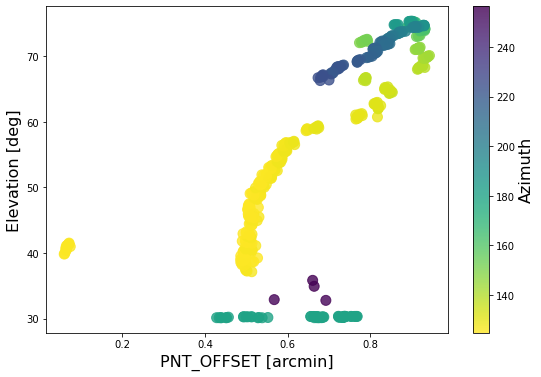

In [182]:
fig = plt.figure(figsize=(9,6))
plt.scatter(df1.PNT_OFFSET, df1.EL, s=100, alpha=0.8, c=df1.AZ, label=f'{len(df1)} Fields', cmap='viridis_r')
# plt.scatter(df1.PNT_OFFSET, df1.EL, s=100, alpha=0.8, c=df1.DATE.dt.month, label=f'{len(df1)} Fields', cmap='viridis_r')
# plt.colorbar().set_label('delta(Azimuth) [arcmin]',fontsize=16)
# plt.colorbar().set_label('Month',fontsize=16)
plt.colorbar().set_label('Azimuth',fontsize=16)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('PNT_OFFSET [arcmin]',fontsize=16)


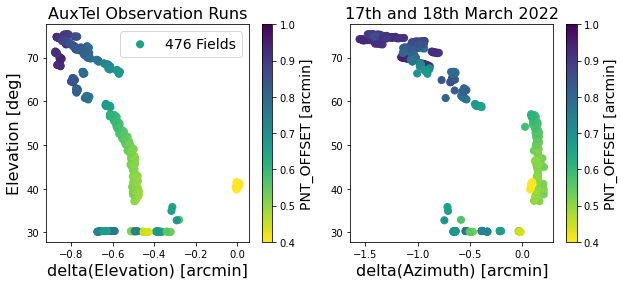

In [181]:
fig = plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(df1.dEL, df1.EL, s=50, c=df1.PNT_OFFSET, vmin=0.4, vmax=1.0, label=f'{len(df1)} Fields', cmap='viridis_r')
# plt.scatter(df1.dEL[outliers2], df1.EL[outliers2], s=50, alpha=0.6)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('delta(Elevation) [arcmin]',fontsize=16)
plt.legend(fontsize=14)
plt.colorbar().set_label('PNT_OFFSET [arcmin]',fontsize=14)
plt.title(f'AuxTel Observation Runs',fontsize=16)

plt.subplot(1, 2, 2)
plt.scatter(df1.dAZ, df1.EL, s=50,label=f'{len(df1)} Fields', c=df1.PNT_OFFSET, vmin=0.4, vmax=1.0, cmap='viridis_r')
# plt.scatter(df1.dEL[outliers2], df1.AZ[outliers2], s=50, alpha=0.6, label='PNT_OFFSET>1 arcmin')
# plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('delta(Azimuth) [arcmin]',fontsize=16)
# plt.legend(fontsize=12)
# plt.title(f'From Feb 2020 up to Nov 2021',fontsize=16)
plt.title('17th and 18th March 2022',fontsize=16)
plt.colorbar().set_label('PNT_OFFSET [arcmin]',fontsize=14)
plt.savefig(f'figures/elevation_offsets_march_2022.png',facecolor='w',transparent=False,dpi=100)

Text(0.5, 1.0, 'AuxTel Observation Runs \n From Feb 2020 up to Nov 2021')

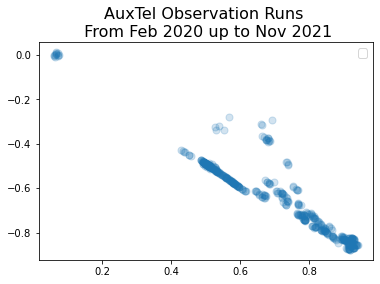

In [103]:
plt.scatter(df1.PNT_OFFSET, df1.dEL, s=50, alpha=0.2)

# plt.xlabel('Pointing Offset [arcmin]',fontsize=16)
plt.legend(fontsize=12)
plt.title(f'AuxTel Observation Runs \n From Feb 2020 up to Nov 2021',fontsize=16)

In [104]:
outliers2 = df1.PNT_OFFSET>1.

Text(0.5, 1.0, 'From Feb 2020 up to Nov 2021')

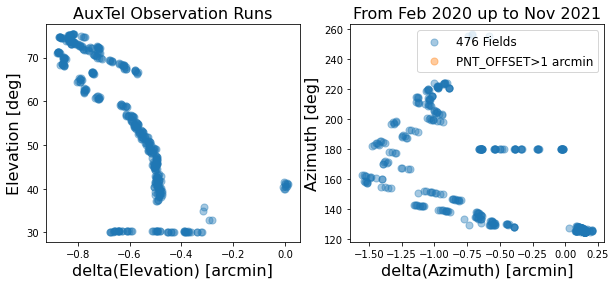

In [105]:
fig = plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(df1.dEL, df1.EL, s=50, alpha=0.4)
plt.scatter(df1.dEL[outliers2], df1.EL[outliers2], s=50, alpha=0.2)
plt.ylabel('Elevation [deg]',fontsize=16)
plt.xlabel('delta(Elevation) [arcmin]',fontsize=16)
# plt.legend(fontsize=12)
plt.title(f'AuxTel Observation Runs',fontsize=16)

plt.subplot(1, 2, 2)
plt.scatter(df1.dAZ, df1.AZ, s=50, alpha=0.4,label=f'{len(df1)} Fields')
plt.scatter(df1.dAZ[outliers2], df1.AZ[outliers2], s=50, alpha=0.4, label='PNT_OFFSET>1 arcmin')
plt.ylabel('Azimuth [deg]',fontsize=16)
plt.xlabel('delta(Azimuth) [arcmin]',fontsize=16)
plt.legend(fontsize=12)
plt.title(f'From Feb 2020 up to Nov 2021',fontsize=16)

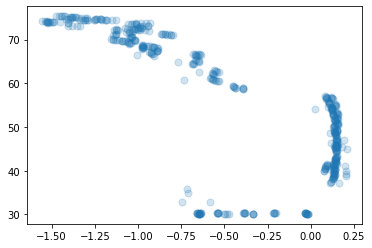

In [106]:
plt.scatter(df1.dAZ, df1.EL, s=50, alpha=0.2)

In [107]:
6.5/s68 ## fov / precision

33.25170938297631

In [108]:
0.2*60

12.0

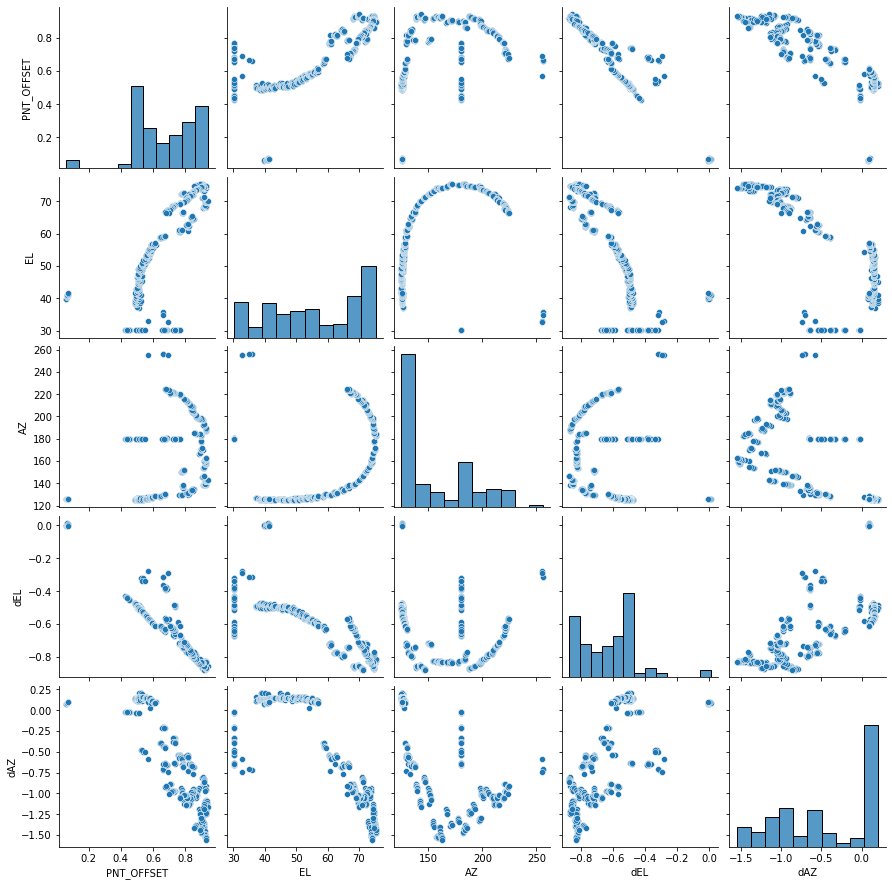

In [141]:
columns = ['PNT_OFFSET','EL','AZ','dEL','dAZ']
sns.pairplot(df1[columns])

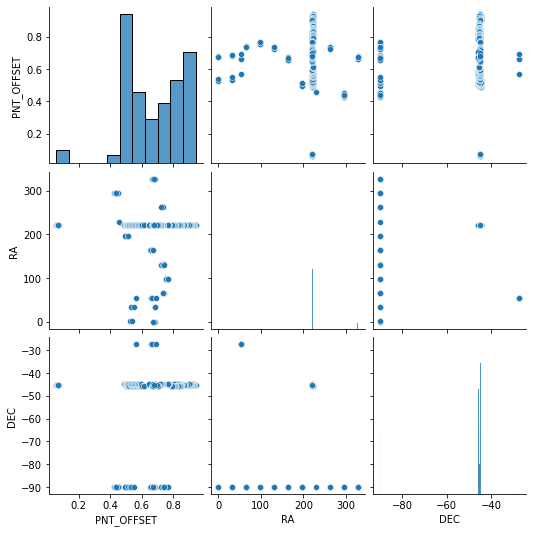

In [110]:
columns = ['PNT_OFFSET','RA','DEC']
sns.pairplot(df1[columns])

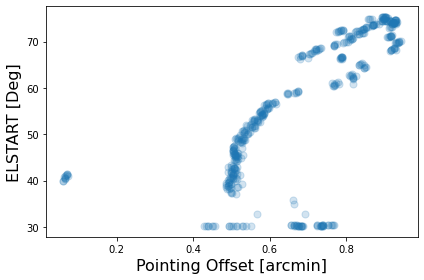

In [111]:
plt.scatter(df1.PNT_OFFSET, df1.EL, s=50, alpha=0.2)
plt.ylabel('ELSTART [Deg]',fontsize=16)
plt.xlabel('Pointing Offset [arcmin]',fontsize=16)
plt.tight_layout()
plt.savefig(f'figures/rev_pointing_offset_elevation_{date}.png',facecolor='w',transparent=False,dpi=100)

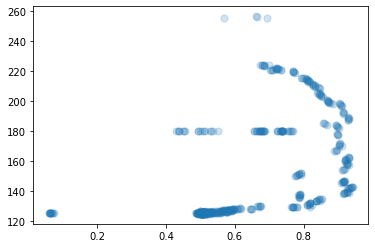

In [112]:
plt.scatter(df1.PNT_OFFSET, df1.AZ, s=50, alpha=0.2)

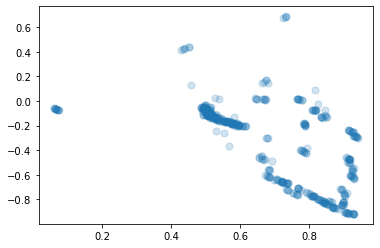

In [113]:
plt.scatter(df1.PNT_OFFSET, df1.dDEC, s=50, alpha=0.2)

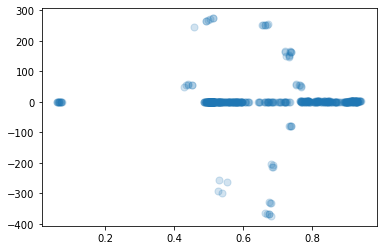

In [114]:
plt.scatter(df1.PNT_OFFSET, df1.dRA, s=50, alpha=0.2)


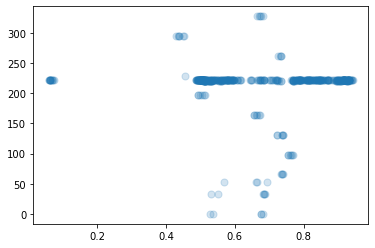

In [115]:
plt.scatter(df1.PNT_OFFSET, df1.RA, s=50, alpha=0.2)

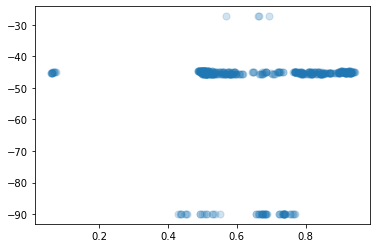

In [116]:
plt.scatter(df1.PNT_OFFSET, df1.DEC, s=50, alpha=0.2)

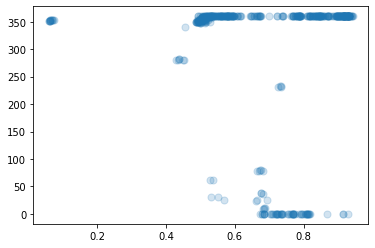

In [117]:
plt.scatter(df1.PNT_OFFSET, df1.ROT_ANGLE, s=50, alpha=0.2)


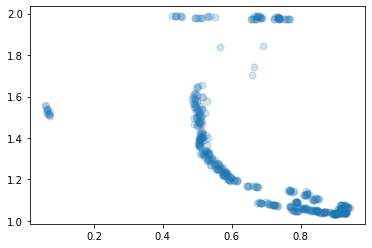

In [118]:
plt.scatter(df1.PNT_OFFSET, df1.AIRMASS, s=50, alpha=0.2)

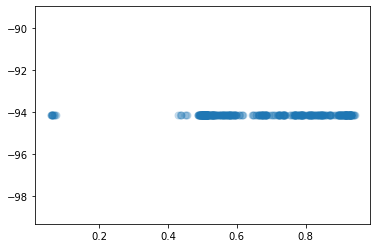

In [119]:
plt.scatter(df1.PNT_OFFSET, df1.TEMP_SET_MD, s=50, alpha=0.2)
# plt.ylim(-94.1501,-94.1497)
# plt.ylim(-104.1,-104.25)

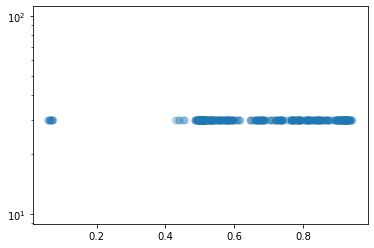

In [120]:
plt.scatter(df1.PNT_OFFSET, df1.EXPTIME, s=50, alpha=0.2)
plt.yscale('log')

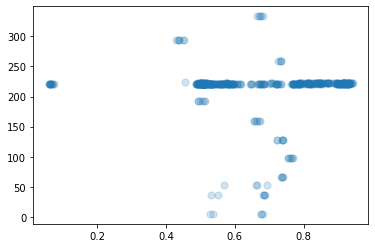

In [121]:
plt.scatter(df1.PNT_OFFSET, df1.RA_WCS, s=50, alpha=0.2)

In [136]:
df1.DATE.dt.day

2022031600240    17
2022031600243    17
2022031600257    17
2022031600258    17
2022031600259    17
                 ..
2022031700468    18
2022031700469    18
2022031700470    18
2022031700471    18
2022031700472    18
Name: DATE, Length: 476, dtype: int64

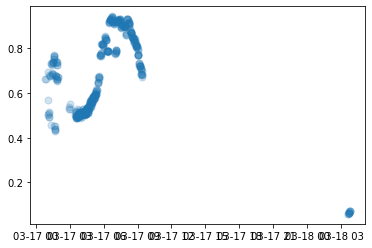

In [140]:
plt.scatter(df1.DATE, df1.PNT_OFFSET, s=50, alpha=0.2)
# plt.xlim(202102100,)
# plt.xscale('log')

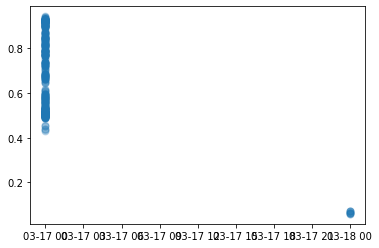

In [123]:
plt.scatter(df1.DATE.dt.date, df1.PNT_OFFSET, s=50, alpha=0.2)

## Checking MetaData Pointing

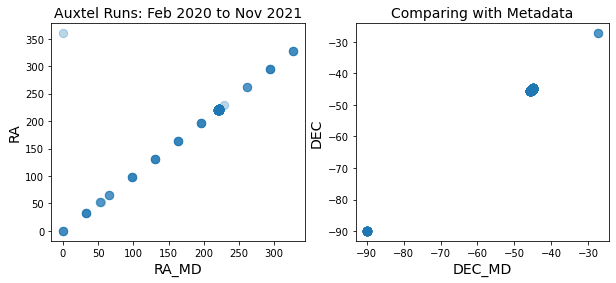

In [124]:
fig = plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.scatter(df.RA_MD,df.RA, s=70, alpha=0.3)
plt.xlabel('RA_MD',fontsize=14)
plt.ylabel('RA',fontsize=14)
plt.title('Auxtel Runs: Feb 2020 to Nov 2021',fontsize=14)
plt.subplot(1, 2, 2)
plt.scatter(df.DEC_MD,df.DEC, s=70, alpha=0.3)
plt.xlabel('DEC_MD',fontsize=14)
plt.ylabel('DEC',fontsize=14)
plt.title('Comparing with Metadata', fontsize=14)

plt.savefig(f'figures/comparing_metadata_pointing_{date}.png',facecolor='w',transparent=False,dpi=100)

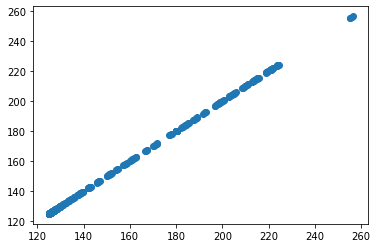

In [125]:
plt.scatter(df.AZSTART_MD,df.AZ)

## Checking Old Method

In [126]:
date = 23032022
df2 = pd.read_csv(f'data/checking_auxtel_pointing_{date}.csv',index_col=0)

df2['dRA'] = (df2['RA_WCS']-df2['RA'])*60
df2['dDEC']= (df2['DEC_WCS']-df2['DEC'])*60

df2['PNT_OFFSET'] = getAngDist(df2['RA_WCS'], df2['DEC_WCS'], df2['RA'], df2['DEC'])

ValueError: x and y must be the same size

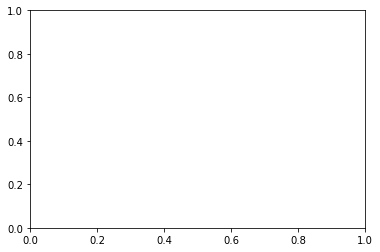

In [127]:
plt.scatter(df2.RA,df.RA)

In [ ]:
plt.scatter(df.RA,df2.RA-df.RA)
plt.ylim(-6.,6.)

ValueError: x and y must be the same size

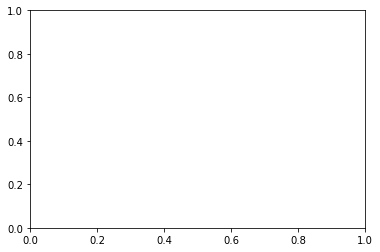

In [128]:
plt.scatter(df2.PNT_OFFSET,df.PNT_OFFSET)

In [ ]:
outliers = np.abs(df2['PNT_OFFSET'])>60
# outliers = np.abs(df.RA-df.RA_MD)>1.
# outliers = np.abs(df2.RA-df.RA)>1.

In [129]:
plt.scatter(df2.PNT_OFFSET[~outliers],df.PNT_OFFSET[~outliers], c=df.DEC[~outliers])
plt.colorbar().set_label('DEC',fontsize=14)
plt.ylabel('PNT_OFFSET_DM',fontsize=14)
plt.xlabel('PNT_OFFSET',fontsize=14)
plt.savefig(f'figures/comparing_version_pointing_offset_{date}.png',facecolor='w',transparent=False,dpi=100)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

From now on I should use the `PNT_OFFSET` generated by the wcs soultions from the DM stack pipeline.

# Other Things

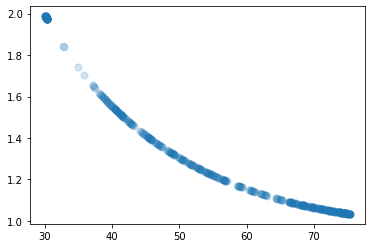

In [130]:
plt.scatter(df1.EL, df1.AIRMASS, s=50, alpha=0.2)